In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_data.shape

(2290, 6)

In [6]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
 gold_data.corr()

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<AxesSubplot:>

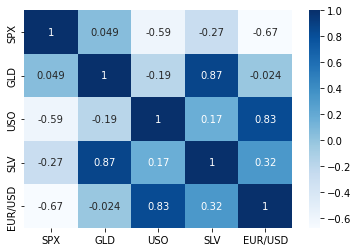

In [25]:
sns.heatmap(gold_data.corr(),annot=True,cmap='Blues')

In [26]:
print(gold_data.corr()['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

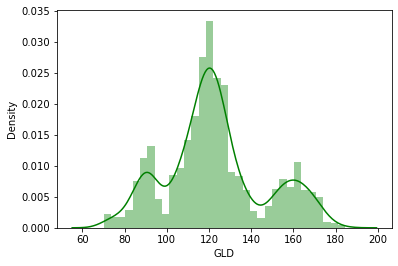

In [27]:
sns.distplot(gold_data['GLD'],color='g')

# Spliting the features & target(GLD)


In [28]:
x = gold_data.drop(['Date','GLD'],axis=1)
y = gold_data['GLD']

In [29]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [30]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

# Model Training : Random Forest Regressor 

In [32]:
model = RandomForestRegressor(n_estimators=100)

In [33]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [34]:
model.score(x_test,y_test)

0.9884569985783714

# Model Evalutaion

In [35]:
prediction = model.predict(x_test)

In [36]:
print(prediction)

[168.48489916  82.23219969 116.13270031 127.56450062 120.81180132
 154.82639799 150.00099833 126.12630019 117.58949868 126.13550066
 116.63370116 172.11750029 141.75159855 167.82689846 115.17310008
 117.53540022 138.10620334 170.33980165 159.58500256 156.68409928
 155.22800088 125.26409994 176.21579982 157.59100342 125.1964002
  93.85939964  76.81440047 120.73139997 119.13429971 167.51509892
  88.23240023 125.44680028  91.05860063 117.73050033 121.03809984
 135.7710012  115.54530113 115.48270103 149.37709914 107.35620081
 104.02190241  87.19259797 126.53010069 117.98400002 153.32189835
 119.77290018 108.36499999 107.97399834  93.13300021 127.19119747
  75.01800046 113.84499951 121.4462003  111.32069888 119.02909913
 120.58039932 158.68620077 168.00800156 147.02039685  85.60449833
  94.63360006  86.85929901  90.45799984 118.90290055 126.5153003
 127.62470067 169.01829983 122.19549911 117.31519917  98.55840005
 168.05060078 142.99579839 131.90090218 121.26570229 120.52659969
 119.7288008

In [37]:
model.score(x_test,y_test)

0.9884569985783714

# Compare the Actual Values & Predicted Values in plot

In [40]:
#y_test = list(y_test)

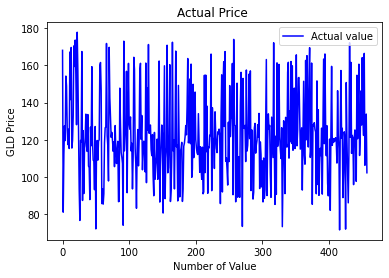

In [46]:
plt.plot(y_test,color='blue',label = 'Actual value')
plt.title("Actual Price ")
plt.xlabel('Number of Value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

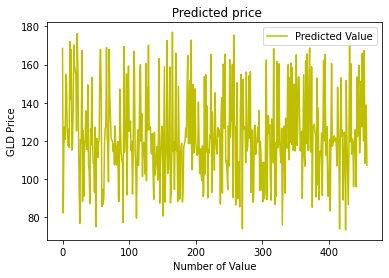

In [45]:
plt.plot(prediction,color='y',label = 'Predicted Value')
plt.title(" Predicted price")
plt.xlabel('Number of Value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

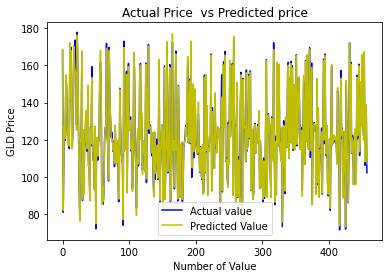

In [47]:
plt.plot(y_test,color='blue',label = 'Actual value')
plt.plot(prediction,color='y',label = 'Predicted Value')
plt.title("Actual Price  vs Predicted price")
plt.xlabel('Number of Value')
plt.ylabel('GLD Price')
plt.legend()
plt.show()